In [13]:
import pandas as pd
df=pd.read_csv('./grouped_data5-1.csv')
df

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,3,119839.69,zero,2853.325952,39946.563333,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,2,83807.86,rest,2044.094146,41903.930000,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,9,159660.80,rest,3801.447619,17740.088889,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,2,119839.69,zero,3072.812564,59919.845000,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,3,125510.82,rest,2918.856279,41836.940000,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,6,119839.69,zero,3072.812564,19973.281667,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,11,57369.61,rest,1639.131714,5215.419091,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,8,119839.69,zero,3328.880278,14979.961250,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,4,75075.31,rest,1787.507381,18768.827500,2,1,46444.260,0,92888.52,high,1


# 잠시 체크-신용 점수와 추정 월급과의 상관계수

In [14]:
import pandas as pd
import numpy as np

# 피어슨 상관계수 계산
correlation = df['estimated_salary'].corr(df['credit_score'])
print(f"피어슨 상관계수: {correlation}")

# 이 참에 전체 상관계수를 한번 더 확인한다

피어슨 상관계수: -0.0013842928679845211


In [15]:
# 일단 데이터 타입을 확인해서 수치형 변수만 골라낸다
df['active_member']=df['active_member'].astype('object')
df['credit_card']=df['credit_card'].astype('object')

df.dtypes

credit_score             int64
credit__section         object
country                 object
age                      int64
age_group               object
gender                  object
age_group_gender        object
tenure                   int64
balance                float64
balance_group           object
balance_per_age        float64
balance_per_tenure     float64
products_number          int64
credit_card             object
salary_per_products    float64
active_member           object
estimated_salary       float64
salary_range            object
churn                    int64
dtype: object

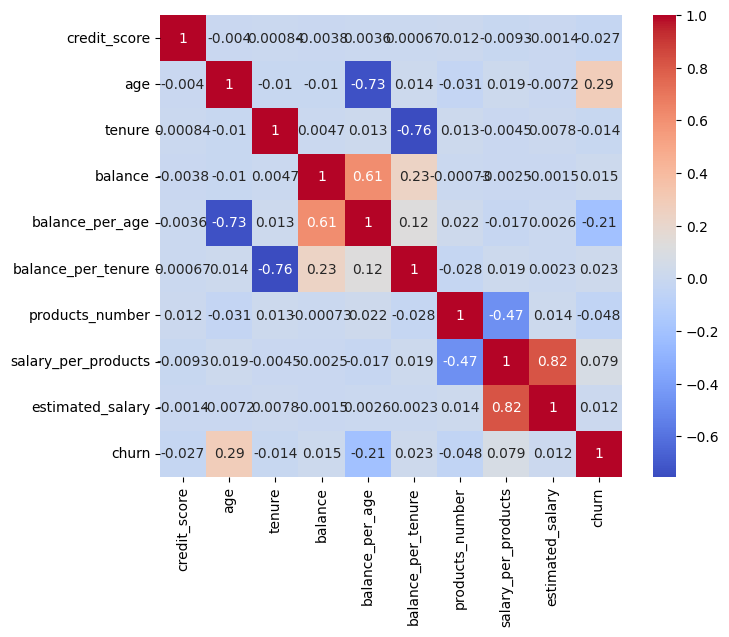

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_num=df.select_dtypes(include=[int,float])

# 상관계수 계산
correlation_matrix = df_num.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
# plt.title('Correlation Heatmap')
plt.show()

# 보통 신용 점수와 추정 월급은 연관이 깊지 않나
# 아무튼 재확인해보니 이 데이터셋에서 상관계수는 낮다

# 종속 변수와의 상관계수. 이것까지 확인해야지 파생변수 버릴지 말지 결정한다

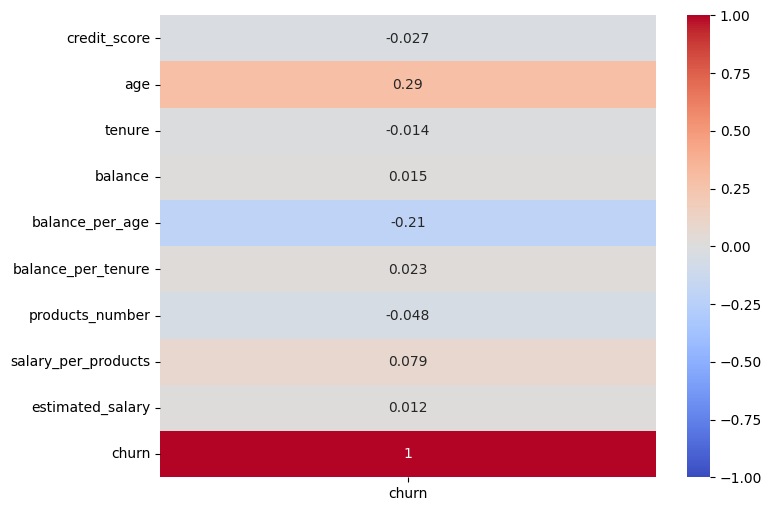

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 숫자형 열 선택
df_num = df.select_dtypes(include=[int, float])

# 상관계수 행렬 계산
corr_matrix = df_num.corr(method='pearson')

# 종속 변수와 독립 변수 간의 상관계수만 추출
target_corr = corr_matrix[['churn']]

# 히트맵 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('종속 변수와 독립 변수 간의 상관계수')
plt.show()

In [ ]:
물론입니다! 전체 과정을 하나의 코드 블록으로 통합하여 제공합니다. 이 코드는 종속 변수의 타입을 `object`로 변경한 후, 크라머의 V 통계량을 계산하고 히트맵으로 시각화합니다.

```python
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 예시 데이터프레임
df = pd.DataFrame({
    'credit_score': [650, 700, 800, 720, 690],
    'age': [25, 40, 35, 50, 45],
    'tenure': [1, 2, 5, 10, 7],
    'balance': [1000, 2000, 1500, 2500, 1200],
    'balance_per_age': [40, 50, 43, 50, 27],
    'balance_per_tenure': [1000, 1000, 300, 250, 171],
    'products_number': [1, 2, 1, 3, 2],
    'salary_per_products': [50000, 60000, 55000, 70000, 65000],
    'estimated_salary': [52000, 61000, 56000, 71000, 66000],
    'churn': [0, 1, 0, 1, 0],
    'region': ['North', 'South', 'East', 'West', 'North'],
    'gender': ['Male', 'Female', 'Female', 'Male', 'Female']
})

# 종속 변수를 object 타입으로 변경
df['churn'] = df['churn'].astype('object')

def cramers_v(x, y):
    # 카이 제곱 검정 수행
    crosstab = pd.crosstab(x, y)
    chi2_stat, _, _, _ = chi2_contingency(crosstab)
    
    # 크라머의 V 계산
    n = crosstab.sum().sum()
    k = min(crosstab.shape) - 1
    return np.sqrt(chi2_stat / (n * k))

# 크라머의 V 통계량 계산
cramers_v_matrix = pd.DataFrame(index=df.columns, columns=df.columns)

for col1 in df.columns:
    for col2 in df.columns:
        if df[col1].dtype == 'object' and df[col2].dtype == 'object':
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = np.nan

cramers_v_matrix = cramers_v_matrix.astype(float)

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, square=True)
plt.title('크라머의 V 통계량')
plt.show()
```

### 요약
1. **데이터 준비**: 예시 데이터프레임을 생성합니다.
2. **종속 변수 타입 변경**: `astype('object')`를 사용하여 `object`로 변경합니다.
3. **크라머의 V 통계량 계산**: 카이 제곱 검정을 수행하고 크라머의 V를 계산합니다.
4. **시각화**: `seaborn`의 히트맵으로 크라머의 V 통계량을 시각화합니다.

이 코드를 실행하면 데이터프레임의 범주형 변수들 간의 크라머의 V 통계량을 시각화한 히트맵을 얻을 수 있습니다.

# 보완점-파생변수를 생성했는데 기존 변수보다 정보 이득 값이 낮다

### 정말 필요한 것만 남겨서 데이터셋 저장

In [18]:
# 정보 이득 낮은 파생변수: 신용 점수 구간, 추정 월급 구간, 나이 그룹룹
# 나이 그룹 성별은 애매하다.. 나이와 성별을 합친 것인데 중간에 있다

df=df.drop(['age','age_group','gender',
        'balance','products_number','credit__section','salary_range',
        'credit_card'],axis=1)
df

,credit_score,country,age_group_gender,tenure,balance_group,balance_per_age,balance_per_tenure,salary_per_products,active_member,estimated_salary,churn
0,619,France,forties_Female,3,zero,2853.325952,39946.563333,101348.880,1,101348.88,1
1,608,Spain,forties_Female,2,rest,2044.094146,41903.930000,112542.580,1,112542.58,0
2,502,France,forties_Female,9,rest,3801.447619,17740.088889,37977.190,0,113931.57,1
3,699,France,thirties_Female,2,zero,3072.812564,59919.845000,46913.315,0,93826.63,0
4,850,Spain,forties_Female,3,rest,2918.856279,41836.940000,79084.100,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,thirties_Male,6,zero,3072.812564,19973.281667,48135.320,0,96270.64,0
9996,516,France,thirties_Male,11,rest,1639.131714,5215.419091,101699.770,1,101699.77,0
9997,709,France,thirties_Female,8,zero,3328.880278,14979.961250,42085.580,1,42085.58,1
9998,772,Germany,forties_Male,4,rest,1787.507381,18768.827500,46444.260,0,92888.52,1
